In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.external import tifffile
import mapManager as mm
from skimage import img_as_float, img_as_ubyte
from skimage.segmentation import mark_boundaries

In [2]:
path = "Clip_cwealth_trial.tif"
img = tifffile.imread(path)

In [3]:
a = img_as_ubyte(img[:500,:500,[0,1,2]])

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/util/dtype.py:179: UserWarning: Downcasting uint16 to uint8 without scaling because max value 238 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [4]:
b = img_as_float(a)

In [5]:
b.max()

0.9333333333333333

In [6]:
#plt.figure(figsize=(20,20))
#plt.imshow(mark_boundaries(a,seg_q2.array))

In [7]:
myMap_gray = mm.Grayscale(img_as_ubyte(img[:500,:500,0]), path, resolution =0.25)

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/util/dtype.py:179: UserWarning: Downcasting uint16 to uint8 without scaling because max value 238 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [8]:
myMap_multi = mm.Multispectral(img_as_ubyte(img[:500,:500,:]), path, resolution =0.25)

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/util/dtype.py:179: UserWarning: Downcasting uint16 to uint8 without scaling because max value 238 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


In [9]:
myMap_multi.array.dtype

dtype('uint8')

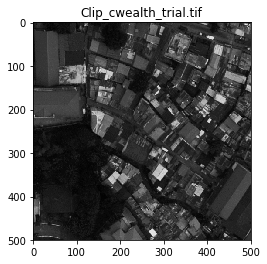

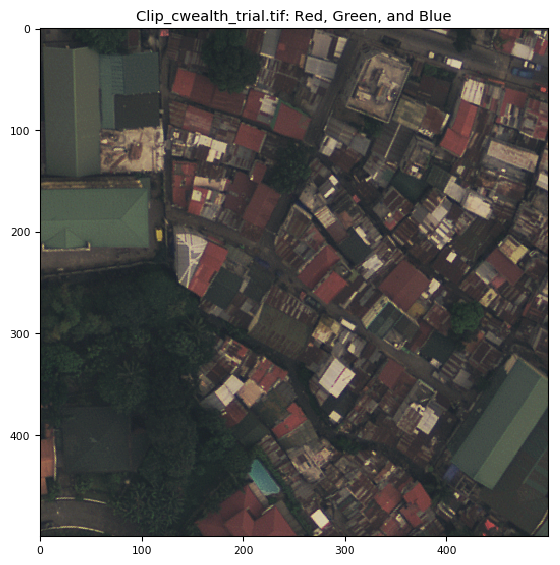

In [10]:
myMap_gray.display()
myMap_multi.display(1,2,3)

In [11]:
print(myMap_gray.statistics())
print(myMap_multi.statistics())

{'mean': 67.320128, 'median': 60.0, 'min': 25, 'max': 238}
Red Band called
Green Band called
Blue Band called
Band 4 called
[{'band': 'Red', 'mean': 74.656008, 'median': 67.0, 'min': 29, 'max': 187}, {'band': 'Green', 'mean': 67.320128, 'median': 60.0, 'min': 25, 'max': 238}, {'band': 'Blue', 'mean': 64.357708, 'median': 57.0, 'min': 31, 'max': 237}, {'band': 'Band 4', 'mean': 61.251208, 'median': 57.0, 'min': 34, 'max': 178}]


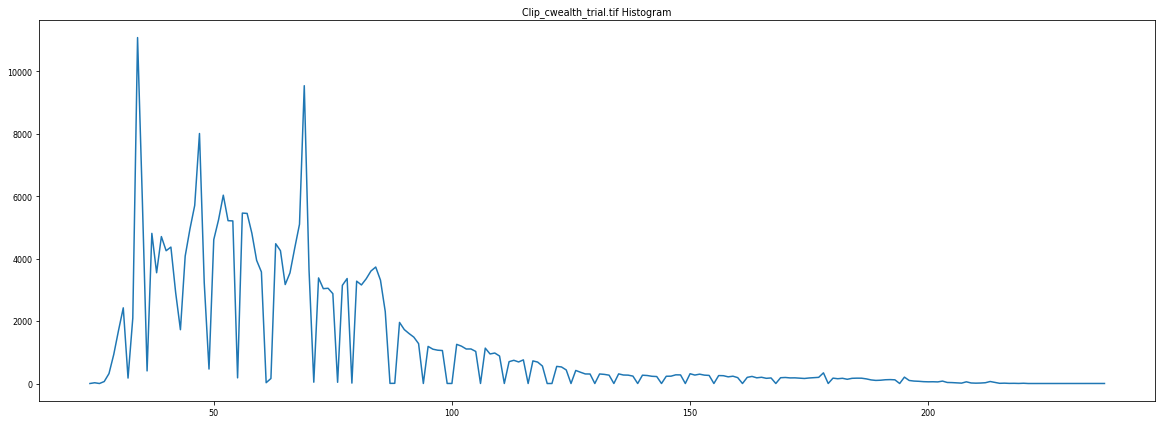

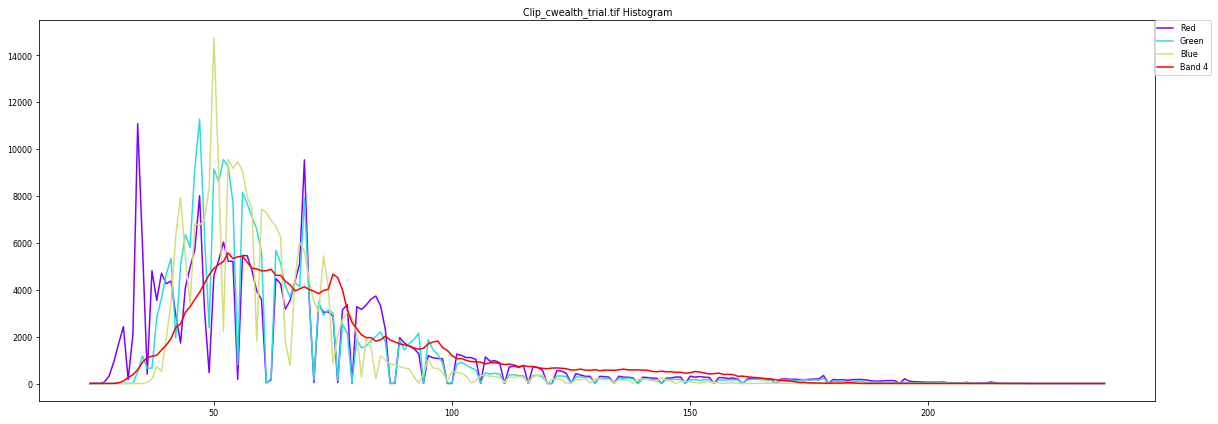

In [12]:
x = myMap_gray.histogram()
y = myMap_multi.histogram()

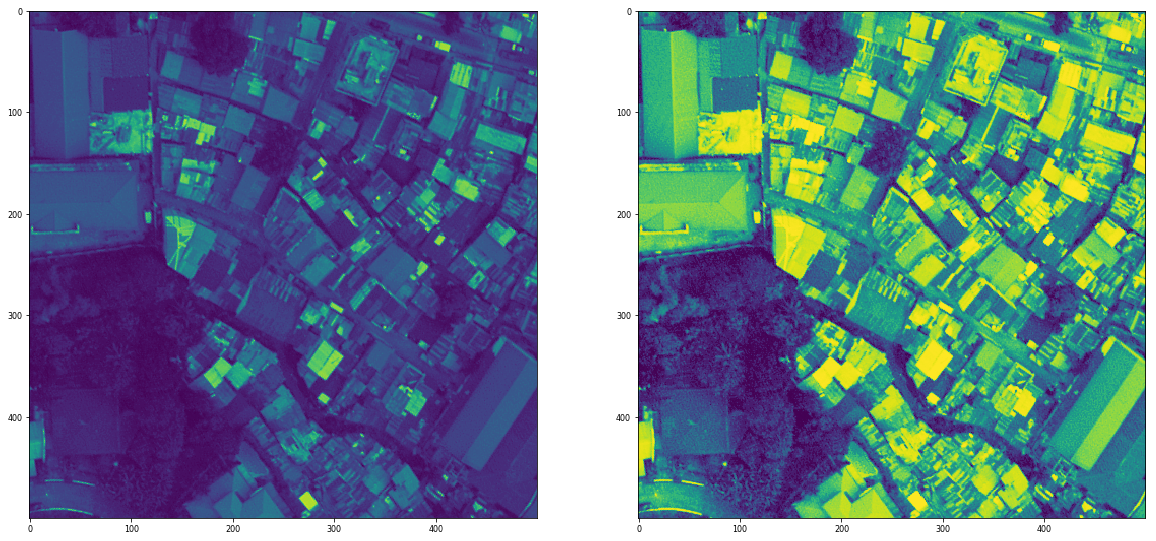

In [13]:
x = myMap_gray.inc_contrast()

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


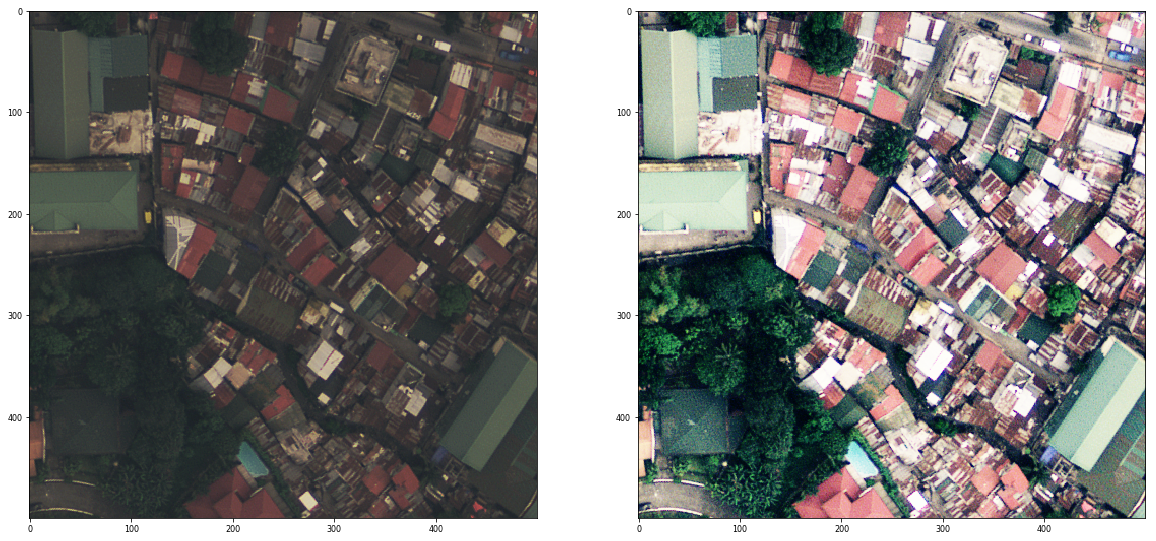

In [14]:
y = myMap_multi.inc_contrast(1,2,3)

In [15]:
myMap_multi.array.dtype

dtype('uint8')

In [16]:
x = myMap_gray.array
y = myMap_multi.array

In [17]:
band1 = myMap_multi[1]

In [18]:
band1.dtype

dtype('uint8')

In [19]:
for i in myMap_multi:
    print (i.dtype)

Red Band called
uint8
Green Band called
uint8
Blue Band called
uint8
Band 4 called
uint8


In [20]:
print(len(myMap_gray))
print(len(myMap_multi))

1
4


In [21]:
myMap_multi.array.dtype

dtype('uint8')

In [22]:
sample_band = np.zeros_like(myMap_multi[1]).astype('uint8')
for i in range(2):
    myMap_multi.add_band(sample_band, "Sample Band {}".format(i+1))
myMap_multi.band_names

Added Band 5 to Map Clip_cwealth_trial.tif
Added Band 6 to Map Clip_cwealth_trial.tif


{1: 'Red', 2: 'Green', 3: 'Blue', 5: 'Sample Band 1', 6: 'Sample Band 2'}

In [23]:
myMap_multi.array.dtype

dtype('uint8')

In [24]:
myMap_multi.name_band(4, 'NIR')
myMap_multi.band_names

Named Band 4 of Map Clip_cwealth_trial.tif as NIR


{1: 'Red',
 2: 'Green',
 3: 'Blue',
 5: 'Sample Band 1',
 6: 'Sample Band 2',
 4: 'NIR'}

In [25]:
myMap_multi.remove_band(5)
myMap_multi.band_names

{1: 'Red', 2: 'Green', 3: 'Blue', 4: 'NIR', 5: 'Sample Band 2'}

In [26]:
myMap_multi.remove_band(5)
myMap_multi.band_names

{1: 'Red', 2: 'Green', 3: 'Blue', 4: 'NIR'}

In [27]:
myMap_multi.array.dtype

dtype('uint8')

In [28]:
sample_segment = np.array([[1,2],[3,4]])
sample_segment = mm.stretch(sample_segment, 250)
cls_segments = mm.Segments(sample_segment, "Sample")

In [29]:
cls_segments.name_segment(4, 'Third')

In [30]:
len(cls_segments)

4

In [31]:
cls_segments[1]

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [32]:
cls_segments[[2,4]]

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [33]:
cls_segments['Third']

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [34]:
for i in cls_segments:
    print("segment found")

segment found
segment found
segment found
segment found


/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


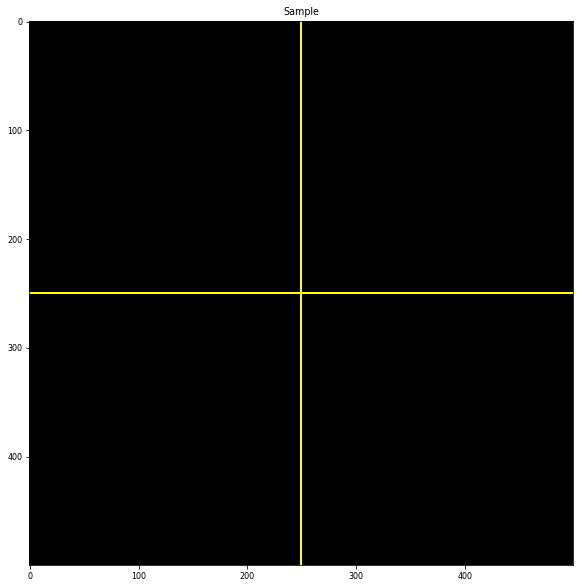

In [35]:
cls_segments.display()

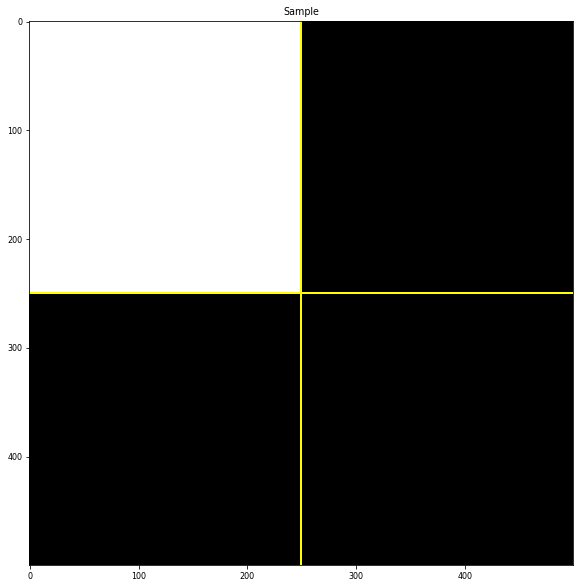

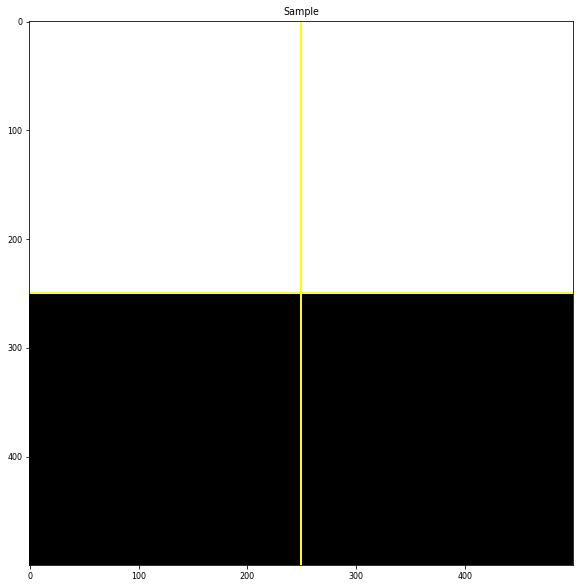

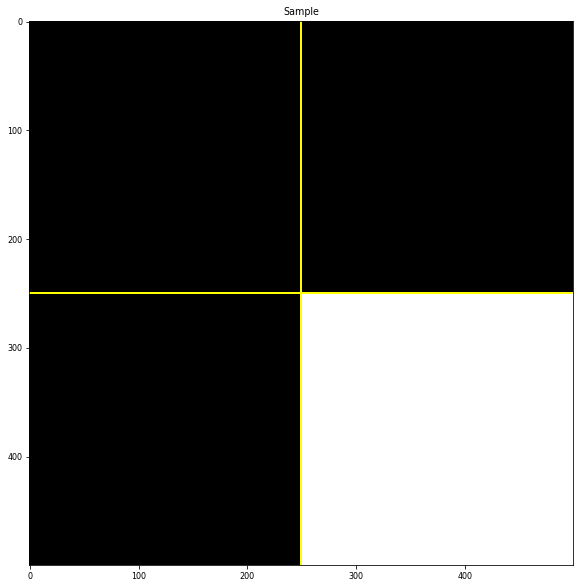

In [36]:
cls_segments.display(1)
cls_segments.display([1,2])
cls_segments.display('Third')

In [37]:
cls_segments.export()

Accessed folder export_data
Exported segments as export_data/Sample(2).txt


In [38]:
myMap_gray.set_mask(cls_segments[1])

In [39]:
newMap = myMap_gray.clip_mask(1)

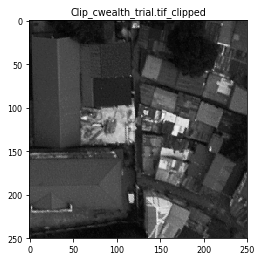

In [40]:
newMap.display()

In [41]:
myMap_multi.set_segments(cls_segments, 'sample')

Quickshift number of segments: 1205


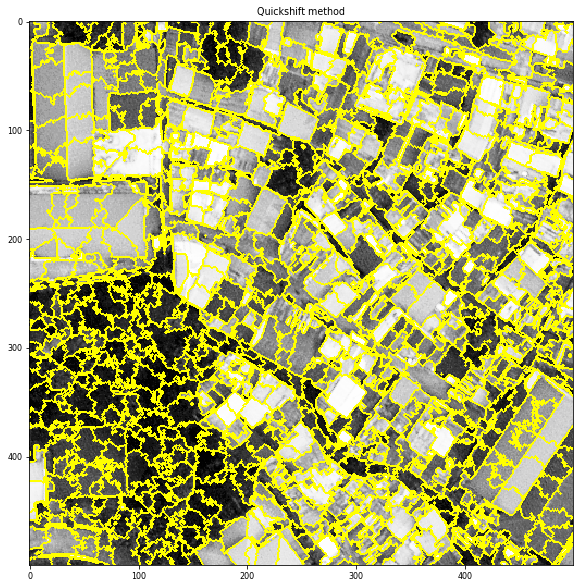

In [42]:
seg_q1 = myMap_multi.segmentMap_quick(contrast=True,set_default=True)

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


Quickshift number of segments: 11973


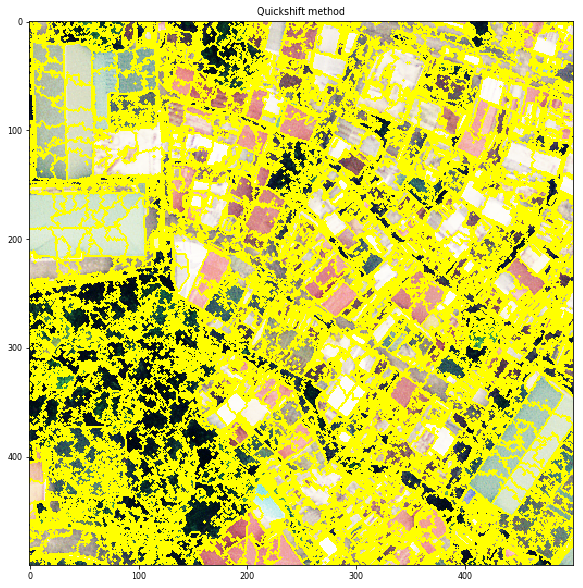

In [43]:
seg_q2 = myMap_multi.segmentMap_quick(1,2,3, contrast=True, set_default=True)

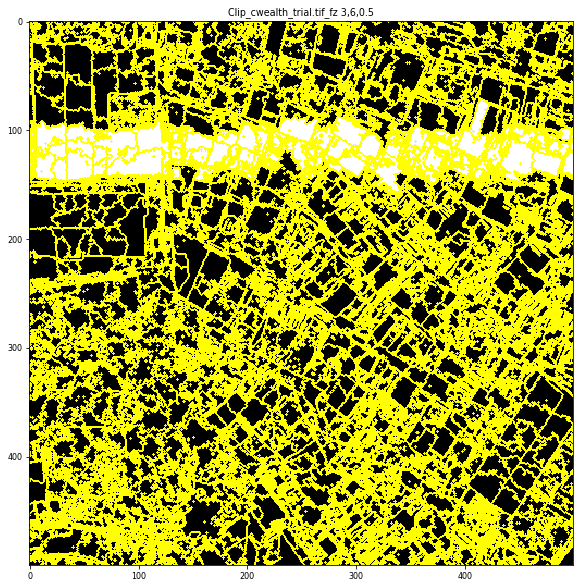

In [44]:
myMap_multi.segments['Quickshift'].display([i for i in range(2000,3000)])

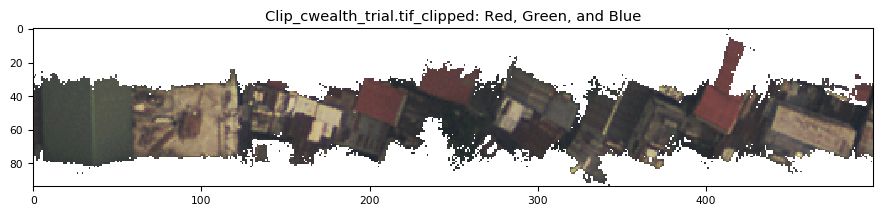

In [45]:
newMap = myMap_multi.clip_segment([i for i in range(2000,3000)], 'Quickshift')

<Figure size 720x720 with 0 Axes>

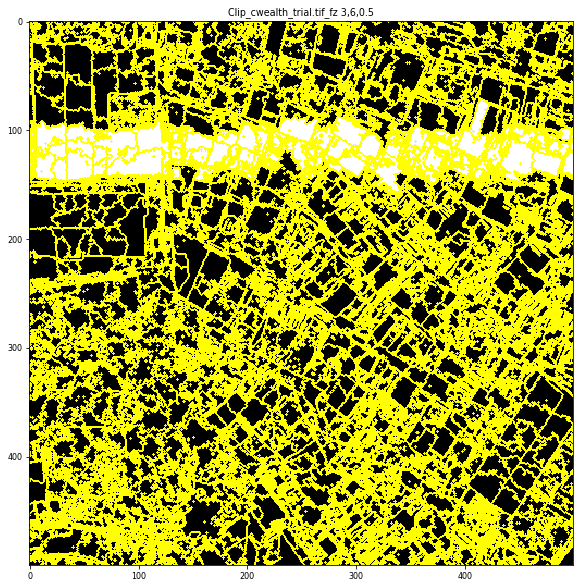

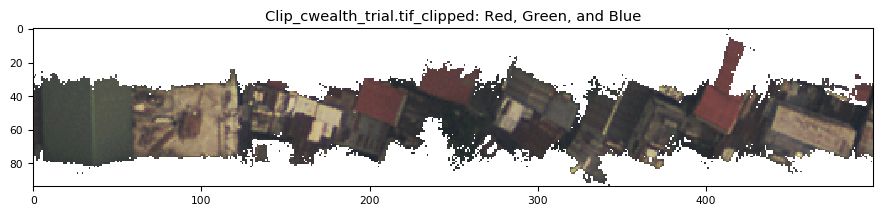

In [46]:
plt.figure(figsize=(10,10))
myMap_multi.segments['Quickshift'].display([i for i in range(2000,3000)])
newMap.display(1,2,3)

In [47]:
myMap_multi.save(overwrite=True)

Accessed folder saved_data
Saved class instance as saved_data/Clip_cwealth_trial.tif.pkl


In [48]:
myMap_multi.array.dtype

dtype('uint8')

In [49]:
newMap = mm.load("Clip_cwealth_trial.tif")

Loaded saved_data/Clip_cwealth_trial.tif.pkl


In [50]:
newMap.segments

{'sample': <mapManager.segmentation.Segments at 0x7f68710b2780>,
 'Quickshift': <mapManager.segmentation.Segments at 0x7f68710b21d0>}

/home/rashomon/anaconda3/envs/MapStuff/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


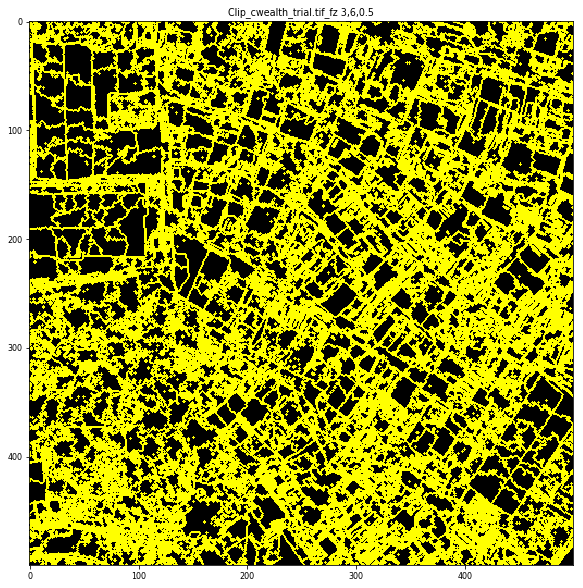

In [51]:
newMap.segments['Quickshift'].display()

(500, 500, 3)


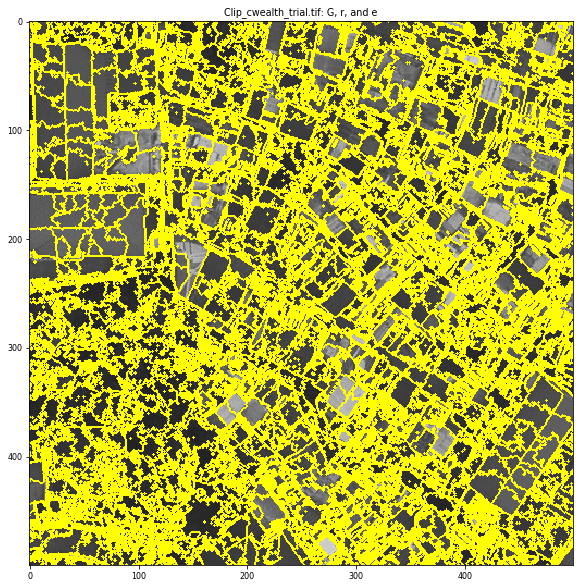

In [52]:
plt.figure(figsize=(10,10))
newMap.view_segments('Quickshift',1,2,3)

In [53]:
myMap_gray.set_segments(seg_q1,'Quickshift')
#myMap_gray.view_segments("Quickshift")

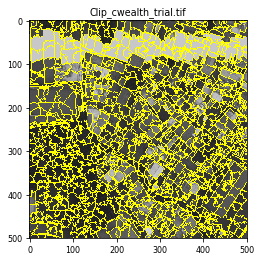

In [54]:
myMap_gray.view_segments("Quickshift", [i for i in range(100,200)])

In [58]:
len(newMap.segments['Quickshift'])

11973

accessed array 0
accessed array 1
accessed array 2
(500, 500, 3)


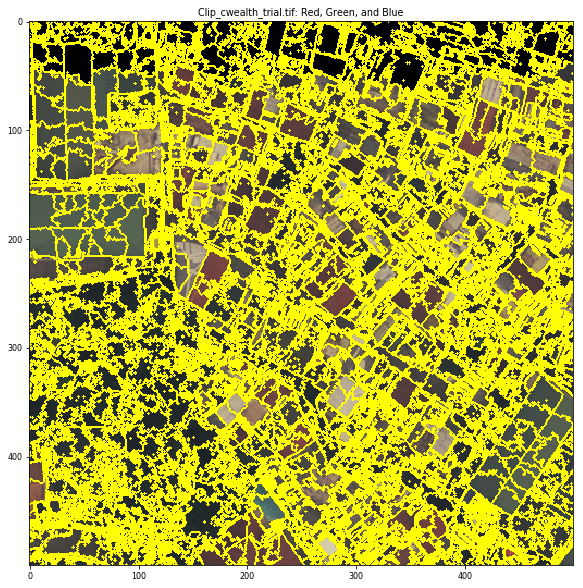

In [59]:
plt.figure(figsize=(10,10))
newMap.view_segments("Quickshift", [i for i in range(1000)],1,2,3)